<a href="https://colab.research.google.com/github/dt-sc-Josue-Diaz/portafolio/blob/main/metahuristicas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
library(tidyverse)
## Funciones

esfera <- function(poblacion){
  return(sum(poblacion^2))
}

## Hiper_elipsiode
hiper_elipsoide <- function(poblacion){

  potencias <- function(n){
    entradas <- numeric()
    for ( i in 1:n){
      entradas[i] <- 2^(i-1)
    }
    return(entradas)
  }
  vector_de_poblacion <- potencias(length(poblacion))*poblacion^2
  return(sum(vector_de_poblacion))

}


## Rosenbrock generalizado

rosenbrock_gene <- function(poblacion){

  d <- length(poblacion)-1

  vector_uno <- (poblacion[1:d]-1)^2
  vector_dos <- (poblacion[2:(d+1)]-poblacion[1:d]^2)
  vector_final <- 100*vector_dos-vector_uno

  return(sum(vector_final))
  }


## Cresta
cresta_schwe <- function(poblacion){
  vector_de_paso <- numeric()
  d <- length(poblacion)

  for (i in 1:d){
    vector_de_paso[i] <- sum(poblacion[1:i])^2
  }
  return(sum(vector_de_paso))
}


## Neumaier
neumaier <- function(poblacion){
  d <- length(poblacion)-2
  vector_uno <- poblacion[1:d]*poblacion[2:(d+1)]
  vector_dos <- (poblacion[1:(d+1)])^2
  return(sum(vector_dos)-sum(vector_uno))
}





generar_nombres <- function(nombre,cantidad){

  nombre <- rep(nombre,cantidad)
  conteo <- as.character(1:cantidad)
  return(paste(nombre,conteo, sep = '_'))
}


generar_poblacion <- function(num_ind,num_var,f_x=esfera,x_min=-1,x_max=1){

  variables <- matrix(runif(num_ind*num_var, min = x_min, max = x_max),
   nrow = num_ind,
    ncol = num_var)

  etas <- matrix(runif(num_ind*num_var, min = x_min, max = x_max),
   nrow = num_ind,
    ncol = num_var)

  evaluacion_funcion <- apply(variables,1,f_x)

  datos <- bind_cols(variables,etas,evaluacion_funcion) |>
      suppressMessages()

  names(datos) <- c(generar_nombres('x', num_var ),
  generar_nombres('eta', num_var), 'f_x' )

  return (datos)
# Fin función
}


generar_mutacion <- function(data){

  factor_uno <-dim(data)[1] # Tamaño de la población
  factor_dos <- (dim(data)[2]-1)/2 # numero de variables

  tao <- 1/sqrt(2* sqrt(factor_uno))
  tao_op <- 1/sqrt(2*factor_uno)

  matriz_normal <- matrix(rnorm(factor_uno*factor_dos),
   nrow = factor_uno, # numero de filas igual al numero de individuos
    ncol = factor_dos) # numero de varaibles

  matriz_normal_dos <- matrix(rnorm(factor_uno*factor_dos),
   nrow = factor_uno, # numero de filas igual al numero de individuos
    ncol = factor_dos) # numero de varaibles

  mutar_variables <- data[c(seq(1,factor_dos))] + # matriz es de cantidad de individuos por variales
     data[c(seq(factor_dos+1,factor_dos*2))]*matriz_normal  # matriz es de cantidad de individuos por variales

  mutar_etas <- data[c(seq(factor_dos+1,2*factor_dos))]*exp(tao_op*matriz_normal_dos+ tao*matriz_normal)

  evaluacion_funcion <- apply(mutar_variables,1,esfera)

  datos <- bind_cols(mutar_variables,mutar_etas,evaluacion_funcion) |> tibble()
  suppressMessages(datos)
  names(datos) <- c(generar_nombres('x', factor_dos ),
  generar_nombres('eta', factor_dos), 'f_x' )

  return(datos)
# Fin función
}

generar_torneo <- function(datos_iniciales,
                   datos_mutados,
                   rep_torneo=25){
  # Parámetros
  factor_uno <-dim(datos_iniciales)[1] # Tamaño de la población
  factor_dos <- (dim(datos_iniciales)[2]-1)/2 # numero de variables

  rep_torneo <- min(rep_torneo,2*factor_uno) # Repeticiones de la competencia

  # Preclasificacion
  pre_competir <- function(){
    vector_uno <- abs(datos_iniciales$f_x) >= abs(datos_mutados$f_x)
    vector_dos <- abs(datos_iniciales$f_x) < abs(datos_mutados$f_x)
    datos <- bind_rows(datos_iniciales[vector_dos,],datos_mutados[vector_uno,]) |>
      suppressMessages()
  return(datos)
  }

  clasificados <- pre_competir() # Datos con los valores f_x mas chicos

  competencia <- function(valor){
    valores_aleatorios <- runif(1:rep_torneo, min = 1, max = factor_uno) |>
      floor()
    wins <- abs(clasificados$f_x[valores_aleatorios]) >= abs(valor)
    return(sum(wins))
  }

  wins <- sapply(clasificados$f_x,competencia)

 datos <- bind_cols(clasificados,Wins=wins) |>
   arrange(-Wins) |> select(-Wins)|>
      suppressMessages()

  return(datos)

}


generar_seleccion <- function(datos_torneo, generaciones = 66, graficas=FALSE){

  mutacion_recursiva <- generar_mutacion(datos_torneo) |>
      suppressMessages()
  torneo_recursivo <- generar_torneo(datos_torneo, mutacion_recursiva)|>
      suppressMessages()


  for (i in 1:generaciones){
    mutacion_recursiva <- generar_mutacion(torneo_recursivo)|>
      suppressMessages()
    torneo_recursivo <- generar_torneo(torneo_recursivo, mutacion_recursiva)|>
      suppressMessages()
  }


  if(graficas==TRUE){
    plot(poblacion$x_1,poblacion$x_2)
    plot(torneo_recursivo$x_1,torneo_recursivo$x_2)
  }

  return(torneo_recursivo)

}






In [ ]:
poblacion <- generar_poblacion(100000,5)
mutacion <- generar_mutacion(poblacion)
torneo <- generar_torneo(poblacion,mutacion)
seleccion <- generar_seleccion(torneo,generaciones = 33)
summary(seleccion)[1]

New names:
• `` -> `...11`


[1] "Min.   :-1.3415460  "

New names:
• `` -> `...1`
• `` -> `...2`
• `` -> `...3`
• `` -> `...4`
• `` -> `...5`
New names:
• `` -> `...5`


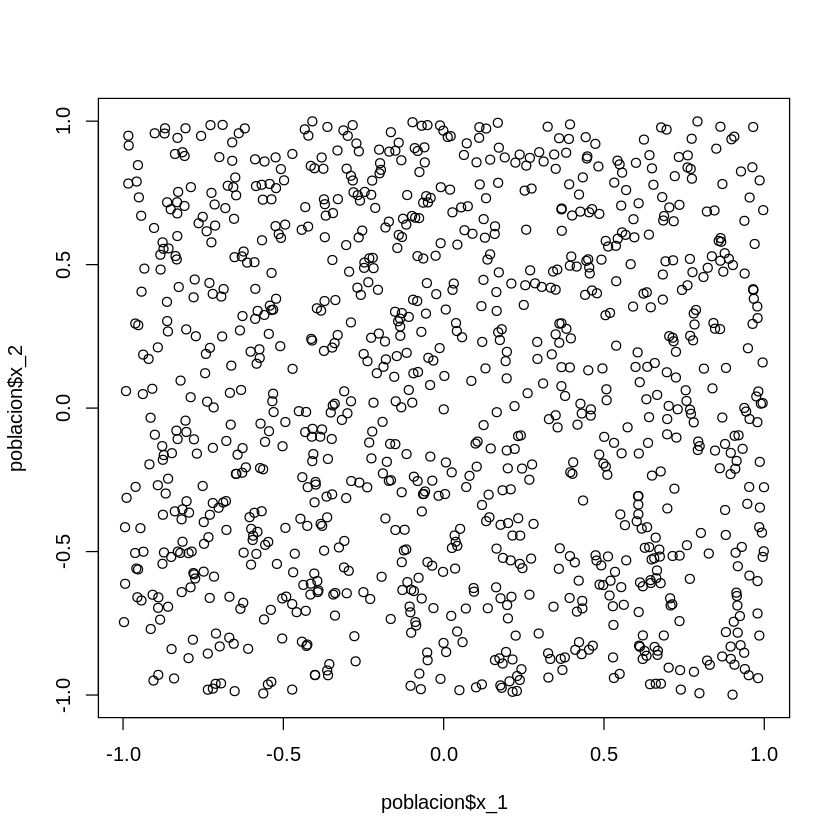

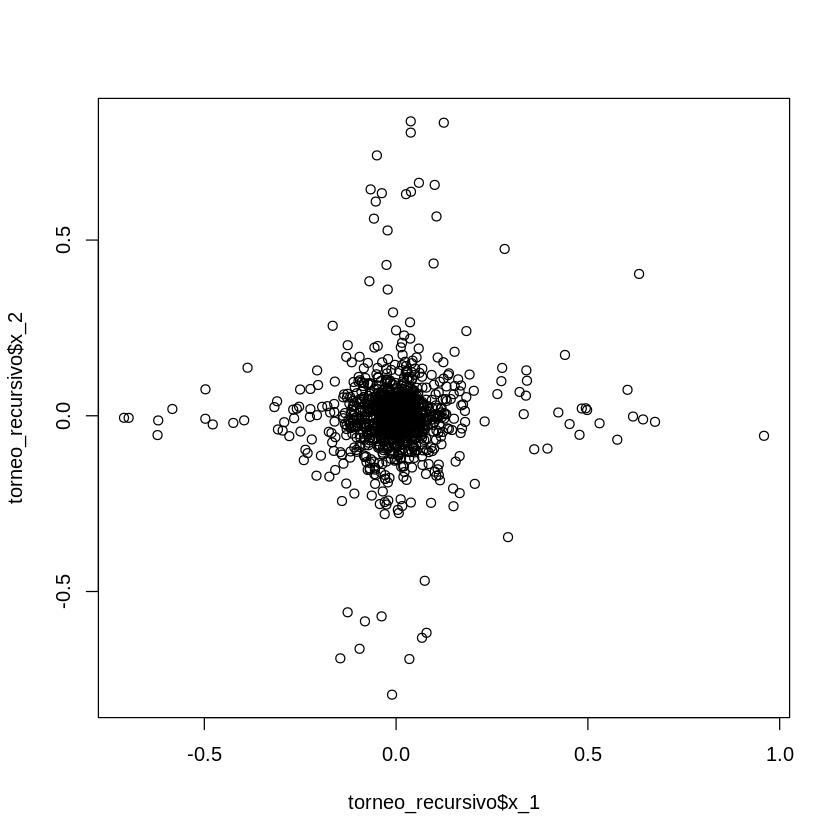

In [ ]:
poblacion <- generar_poblacion(1000,2,rosenbrock_gene)
mutacion <- generar_mutacion(poblacion)
torneo <- generar_torneo(poblacion,mutacion)
seleccion <- generar_seleccion(torneo,graficas = TRUE)


New names:
• `` -> `...1`
• `` -> `...2`
• `` -> `...3`
• `` -> `...4`
• `` -> `...5`
New names:
• `` -> `...5`


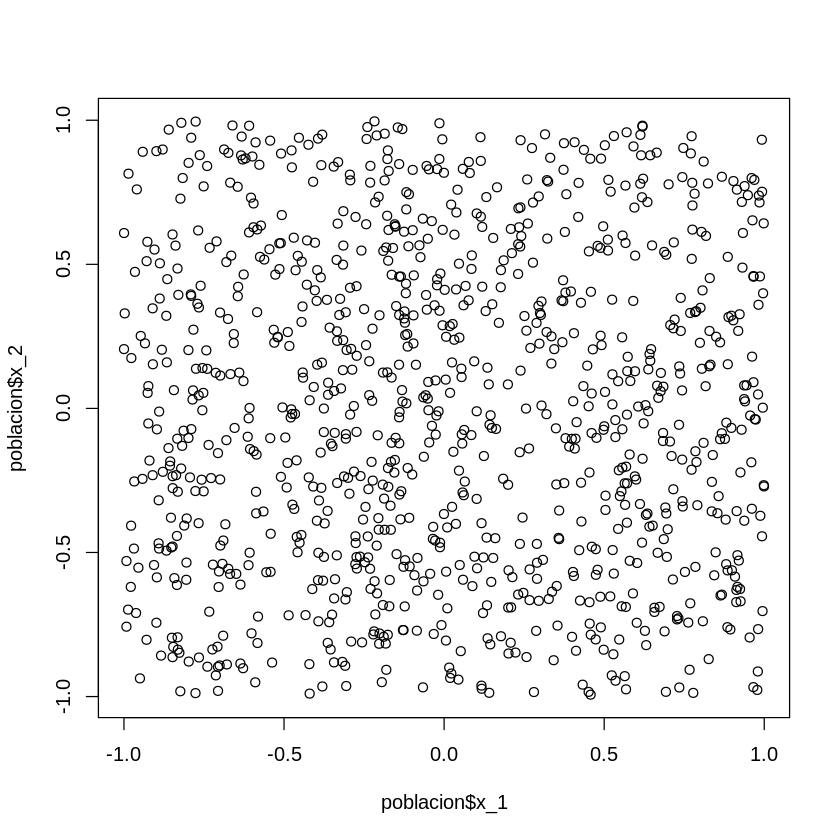

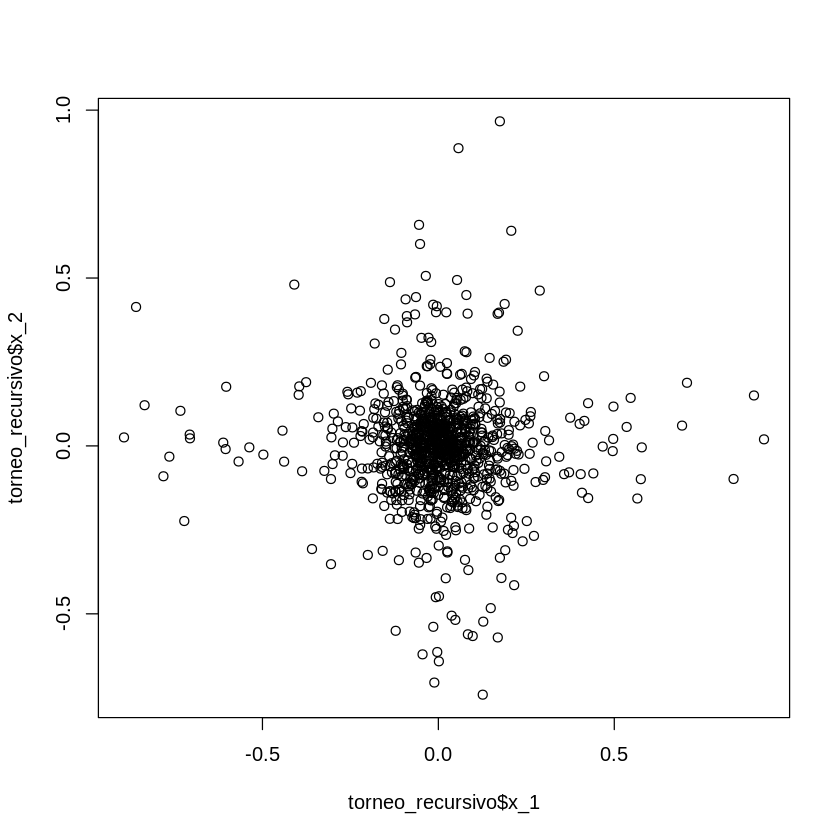

In [ ]:
poblacion <- generar_poblacion(1000,2,hiper_elipsoide)
mutacion <- generar_mutacion(poblacion)
torneo <- generar_torneo(poblacion,mutacion)
seleccion <- generar_seleccion(torneo,generaciones = 33, graficas = TRUE)

New names:
• `` -> `...1`
• `` -> `...2`
• `` -> `...3`
• `` -> `...4`
• `` -> `...5`
New names:
• `` -> `...5`


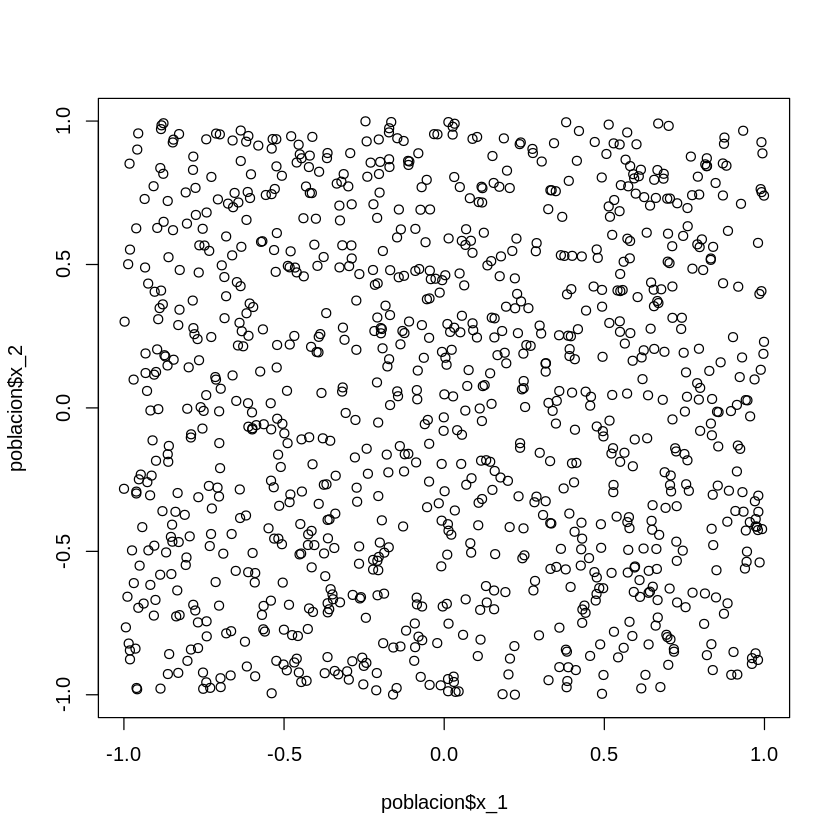

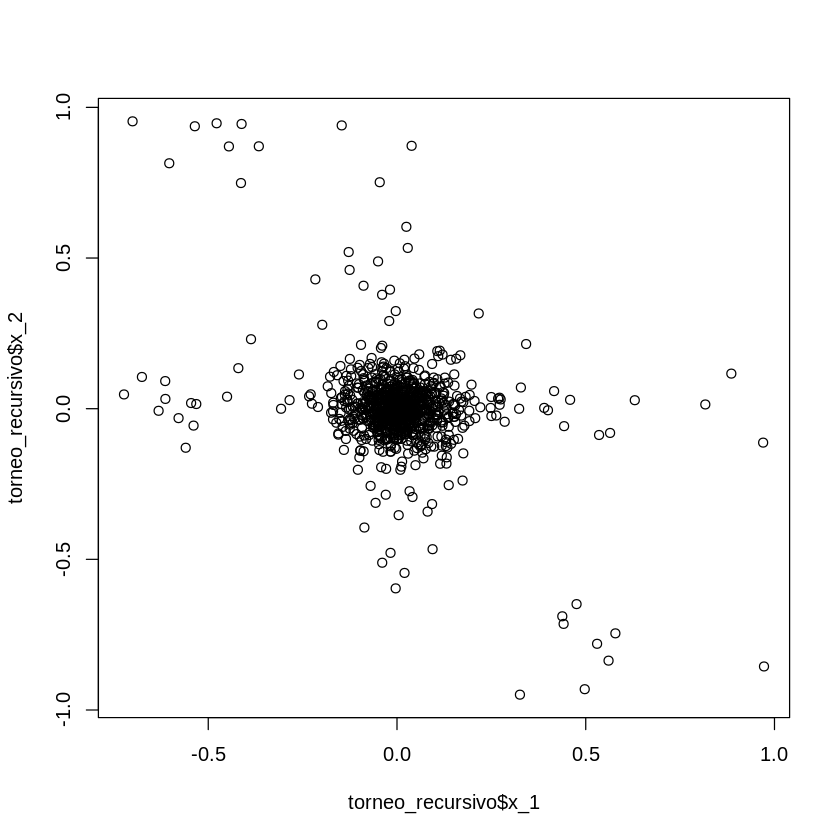

In [ ]:
poblacion <- generar_poblacion(1000,2,cresta_schwe)
mutacion <- generar_mutacion(poblacion)
torneo <- generar_torneo(poblacion,mutacion)
seleccion <- generar_seleccion(torneo,graficas = TRUE)

New names:
• `` -> `...1`
• `` -> `...2`
• `` -> `...3`
• `` -> `...4`
• `` -> `...5`
New names:
• `` -> `...5`


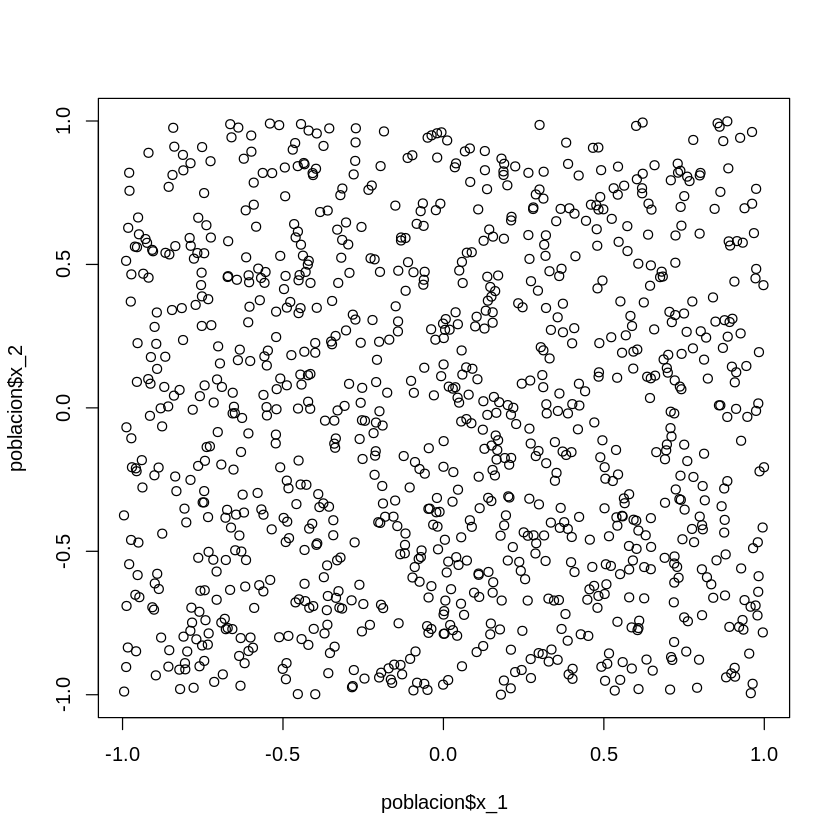

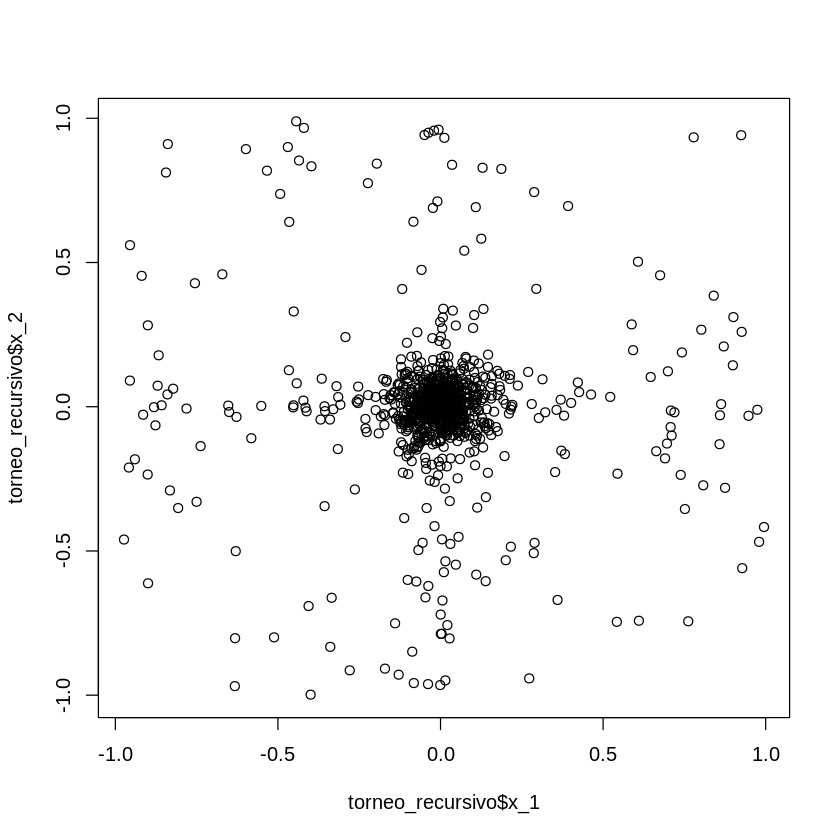

In [ ]:
poblacion <- generar_poblacion(1000,2,neumaier)
mutacion <- generar_mutacion(poblacion)
torneo <- generar_torneo(poblacion,mutacion)
seleccion <- generar_seleccion(torneo,graficas = TRUE)

In [ ]:
esfera <- function(x,y) x^2+ y^2
hiper_elip <- function(x,y) x+2*y
rosen <- function(x,y) 100*(y-x)^2+(x-1)^2
cresta <- function(x,y) x^2+(x+y)^2
neum <- function(x,y) (x-1)^2-x*y

x <- seq(-1,1,length =100)
y <- seq(-1,1,length =100)


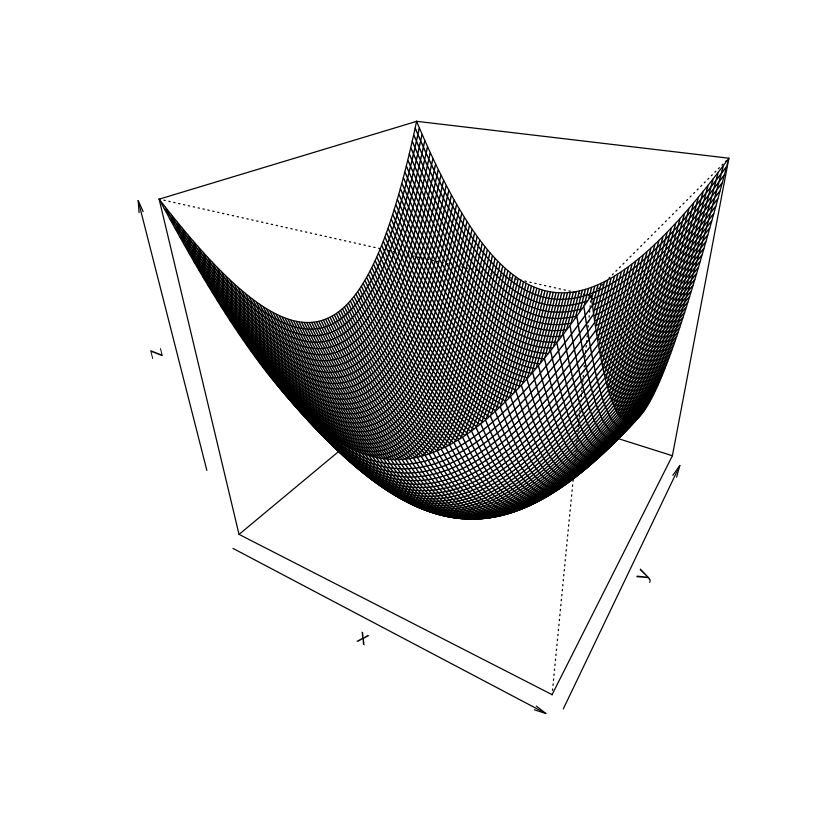

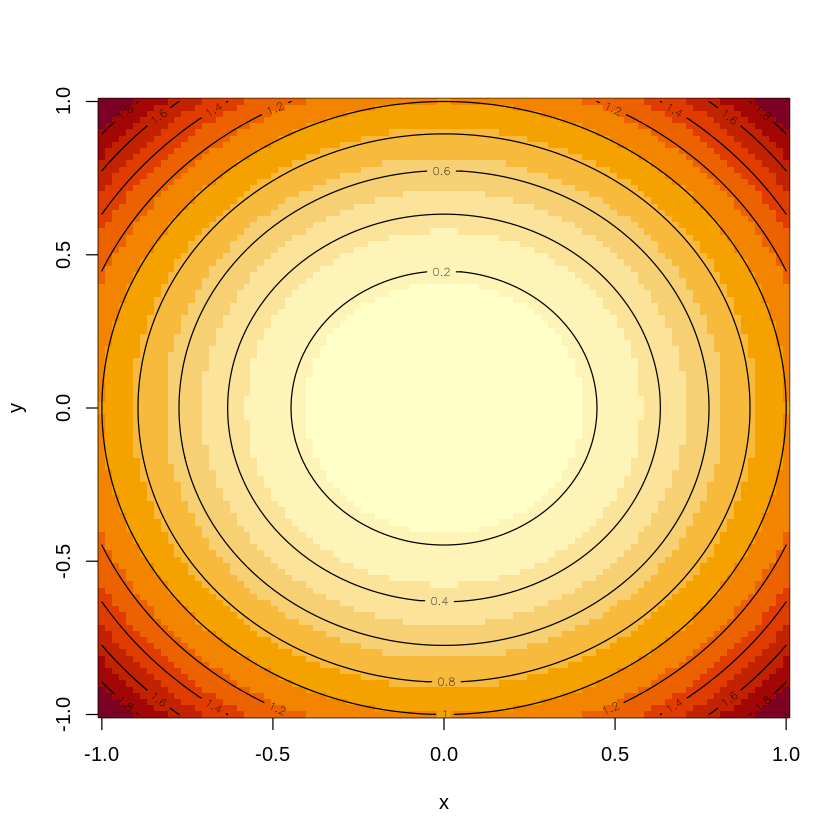

In [ ]:
z = outer(x, y, esfera)
persp(x,y,z, theta = 30, phi = 30)
image(x,y,z)
contour(x,y,z,add = T)


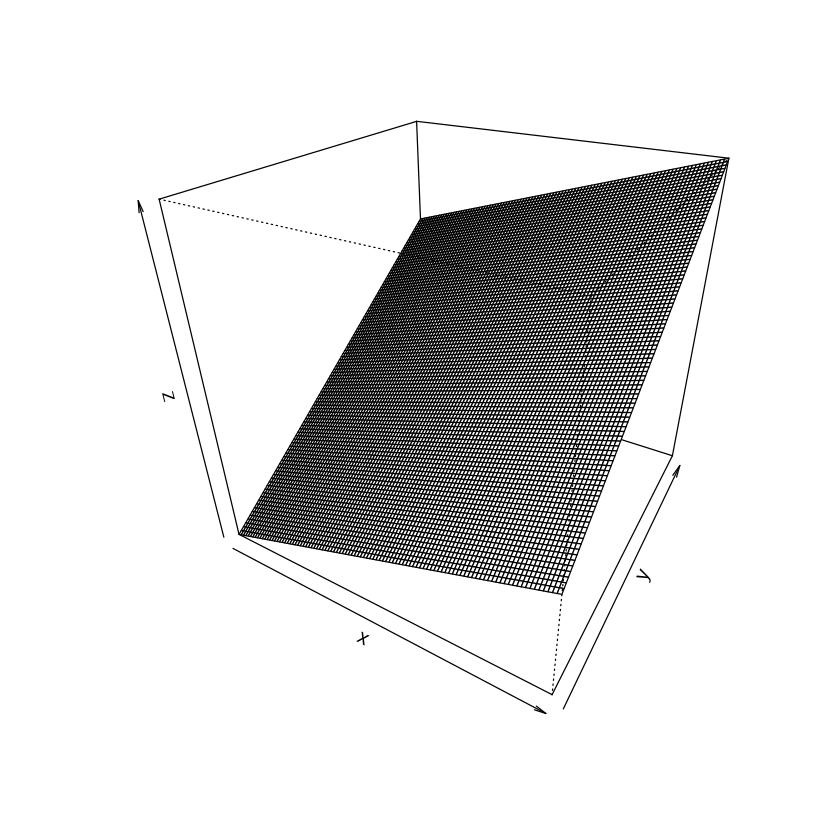

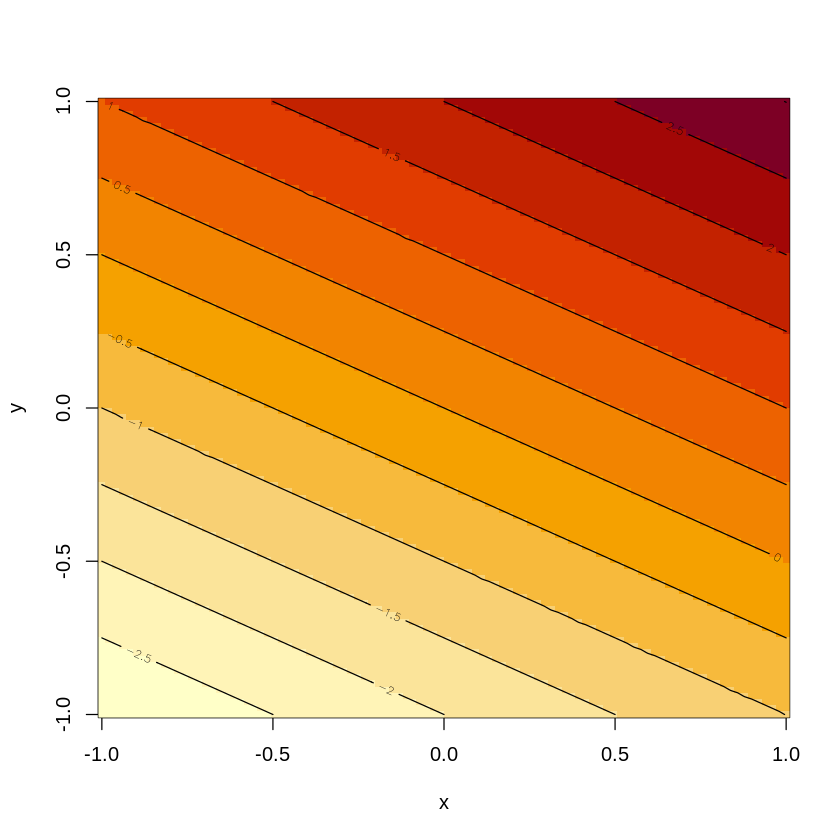

In [ ]:
z = outer(x, y, hiper_elip)
persp(x,y,z, theta = 30, phi = 30)
image(x,y,z)
contour(x,y,z,add = T)

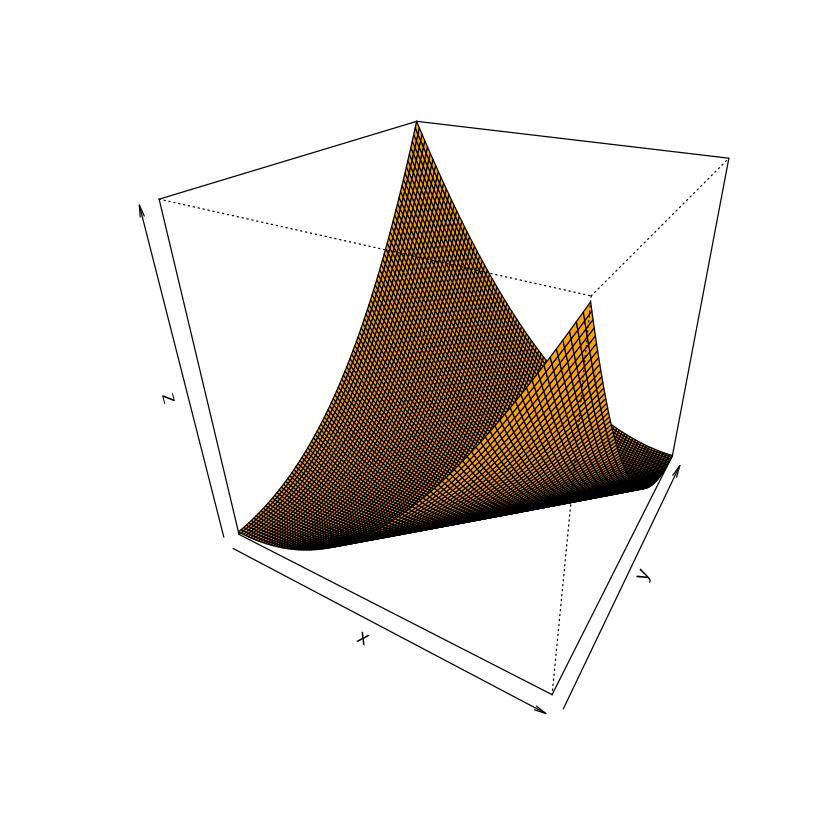

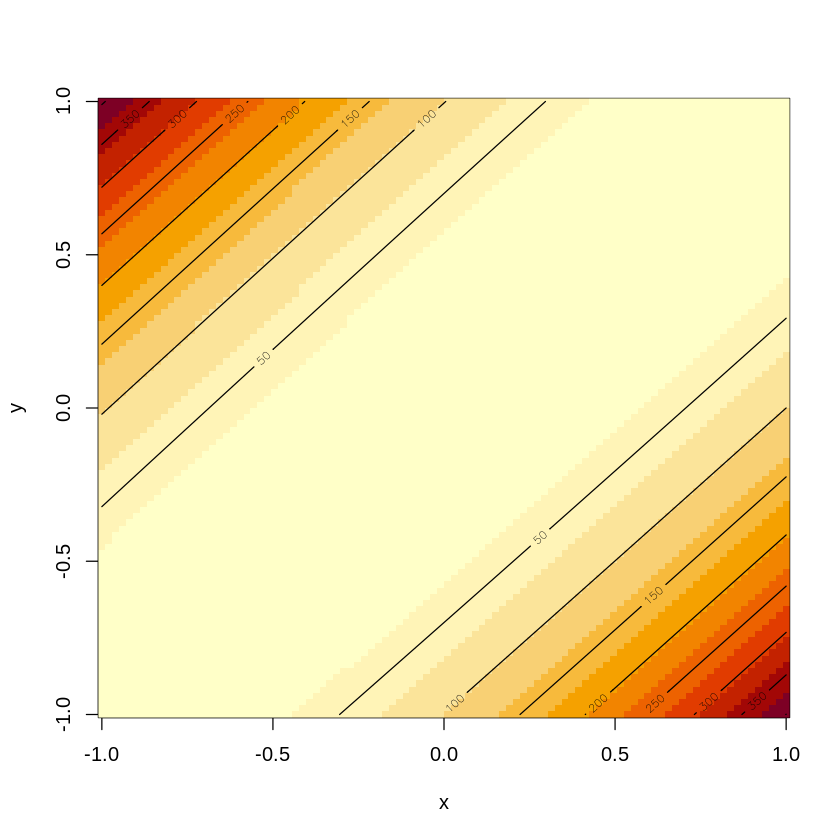

In [ ]:
z = outer(x, y, rosen)
persp(x,y,z, theta = 30, phi = 30, col = "orange")
image(x,y,z)
contour(x,y,z,add = T)

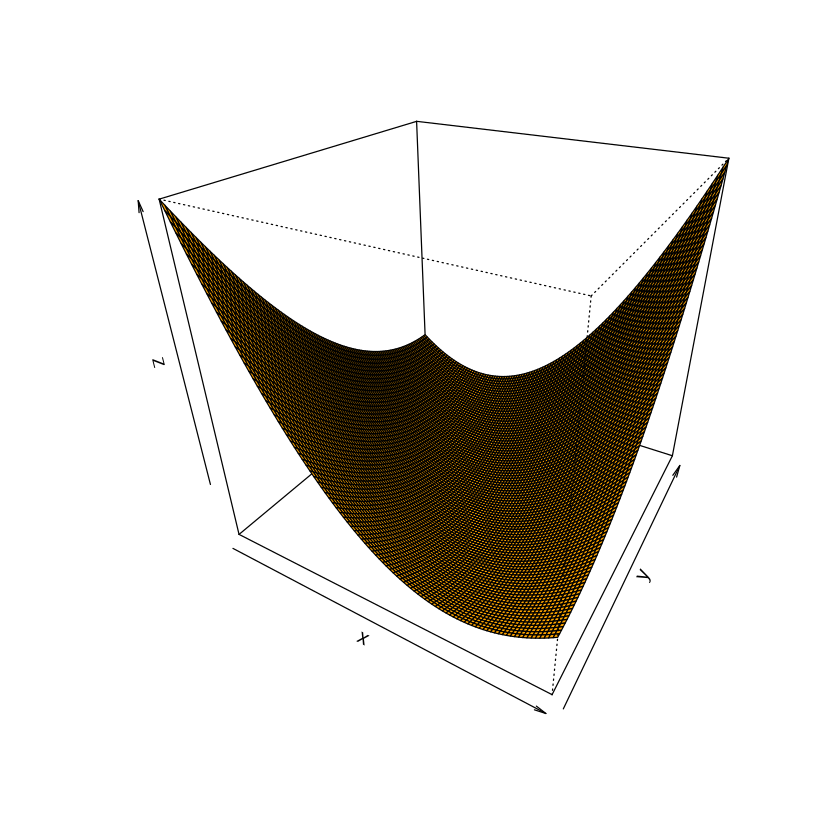

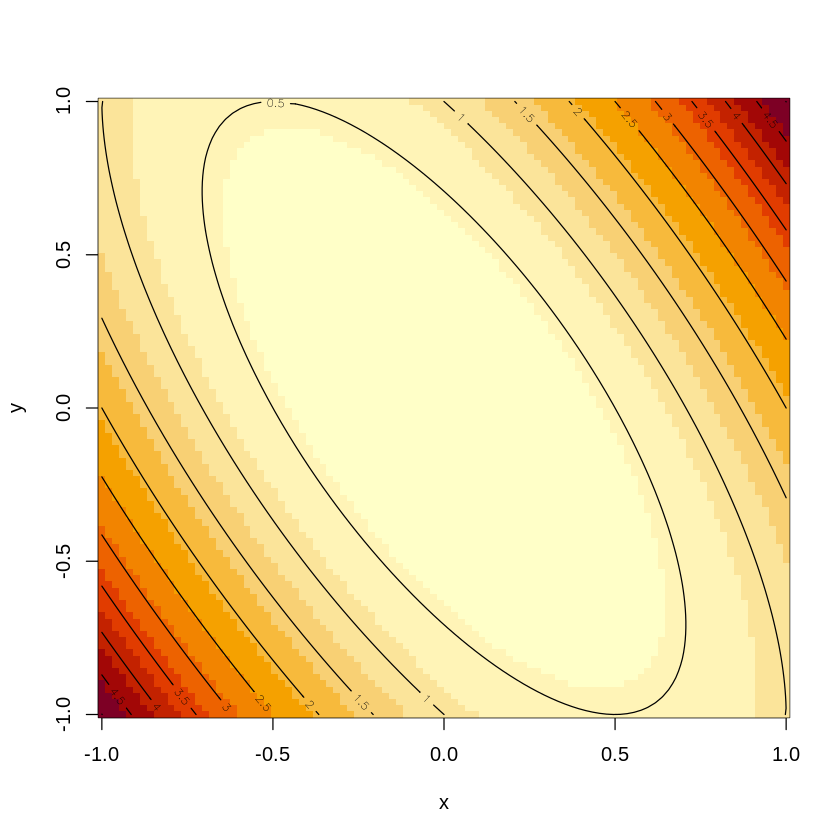

In [ ]:
z = outer(x, y, cresta)
persp(x,y,z, theta = 30, phi = 30, col = "orange")
image(x,y,z)
contour(x,y,z,add = T)

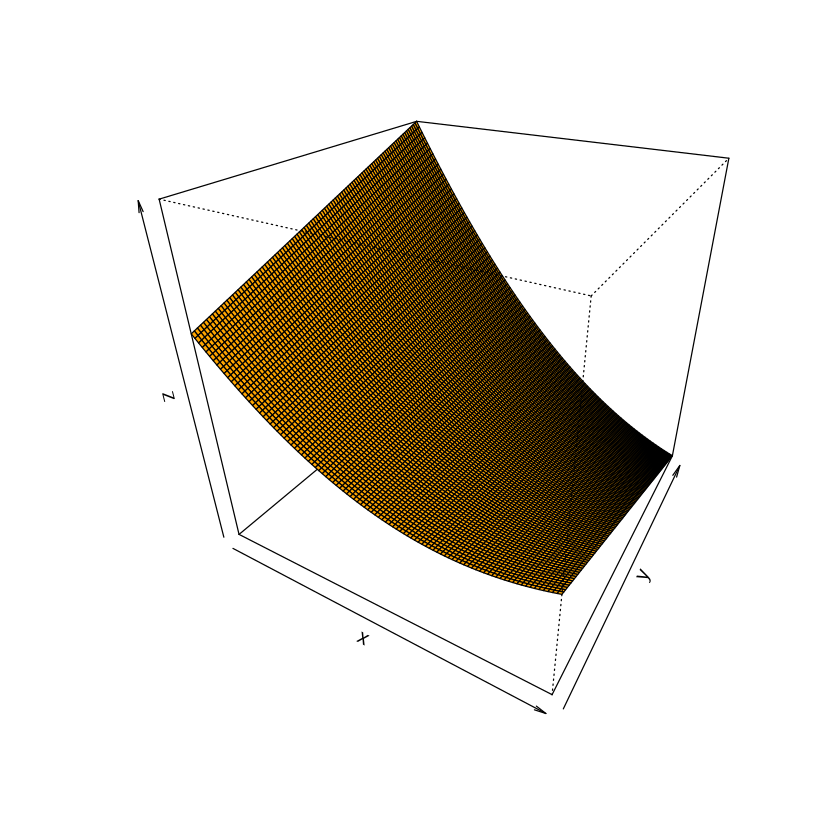

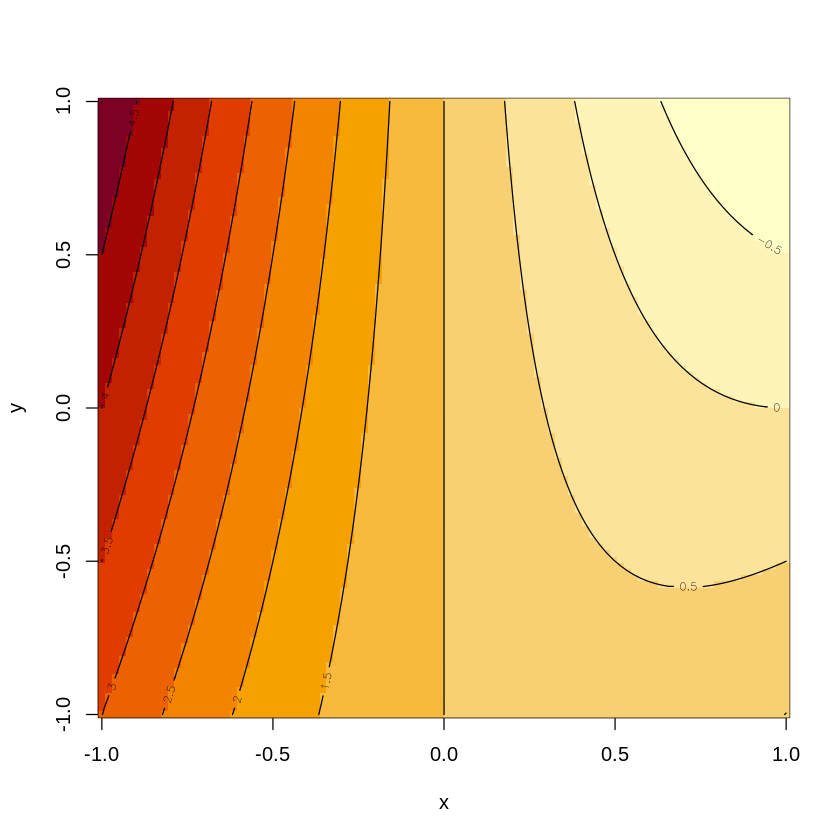

In [ ]:
z = outer(x, y, neum)
persp(x,y,z, theta = 30, phi = 30, col = "orange")
image(x,y,z)
contour(x,y,z,add = T)